# Email Ham vs Spam Classification

### Team: Devyn Hughes, Sean Deery

## Import the libraries

In [1]:
# basic
import os
import sys
import random
import string
import pandas as pd

# text processing
import nltk
from nltk.corpus import stopwords

# visulaizations
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn import metrics


## Get the Data

In [2]:
# define the path to the corpus
path = "C:/Users/sdeer/OneDrive/Documents/Learning/Syracuse/Classes/4 Natural Language Processing/Final Project/EmailSpamCorpora/corpus"

# create an empty list for labels and text data
raw_data_list = []

# iterate through each file and append labels and text to lists
for label in os.listdir(path):
    for file in os.listdir(path + "/" + label):
        file = open(path + "/" + label + "/" + file, 'r', encoding="latin-1")
        raw_data_list.append((label, str(file.read())))
        file.close()

## Exploratory Data Analysis

### Example email

In [3]:
# print out an example email
print("Example: \n\n" +
     "label: " + raw_data_list[1][0] + "\n\n" +
     raw_data_list[1][1])

Example: 

label: ham

Subject: vastar resources , inc .
gary , production from the high island larger block a - 1 # 2 commenced on
saturday at 2 : 00 p . m . at about 6 , 500 gross . carlos expects between 9 , 500 and
10 , 000 gross for tomorrow . vastar owns 68 % of the gross production .
george x 3 - 6992
- - - - - - - - - - - - - - - - - - - - - - forwarded by george weissman / hou / ect on 12 / 13 / 99 10 : 16
am - - - - - - - - - - - - - - - - - - - - - - - - - - -
daren j farmer
12 / 10 / 99 10 : 38 am
to : carlos j rodriguez / hou / ect @ ect
cc : george weissman / hou / ect @ ect , melissa graves / hou / ect @ ect
subject : vastar resources , inc .
carlos ,
please call linda and get everything set up .
i ' m going to estimate 4 , 500 coming up tomorrow , with a 2 , 000 increase each
following day based on my conversations with bill fischer at bmar .
d .
- - - - - - - - - - - - - - - - - - - - - - forwarded by daren j farmer / hou / ect on 12 / 10 / 99 10 : 34
am - - - - - - - 

### Worcloud

In [4]:
def create_wordcloud(data_list):
    # add all of the text together
    all_text = ' '.join([text for label, text in data_list])

    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=None,  include_numbers=True).generate(all_text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

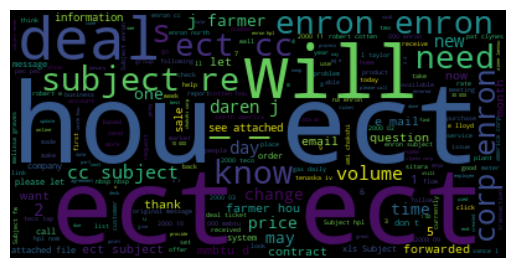

In [5]:
# create a wordcloud for the raw text
create_wordcloud(raw_data_list)

### Counts of ham vs spam

In [6]:
# define a function to display the counts of each label
def display_label_counts(data_list):
    
    # print the total numbre of emails
    print("total: " + str(len(data_list)))
    
    # get the counts for each label
    ham_count = len([label for label, text in data_list if label=='ham'])
    spam_count = len([label for label, text in data_list if label=='spam'])
    
    # create a dataframe of the label counts
    label_groups = pd.DataFrame({'Label': ["ham", "spam"], 'Count': [ham_count, spam_count]})
    print(label_groups)
    
    # create a barplot of the label counts
    plt.figure(figsize=(8,5))
    ax = sns.barplot(x="Label", y="Count", data=label_groups)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(label="Email Distribution")
    plt.show()

total: 5172
  Label  Count
0   ham   3672
1  spam   1500


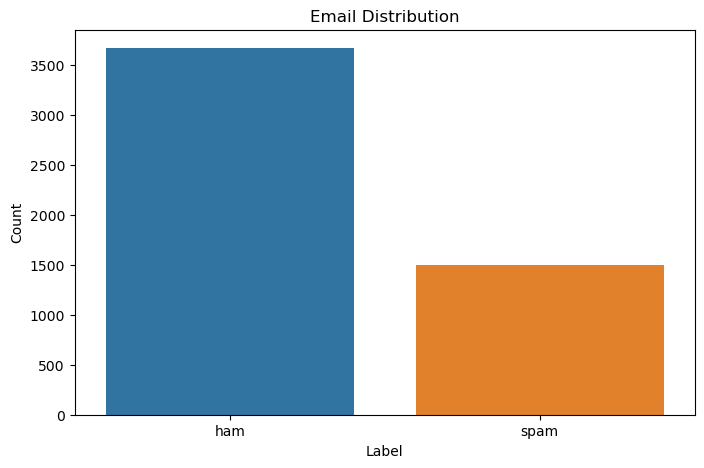

In [7]:
# get the counts for each label
display_label_counts(raw_data_list)

## Data Preprocessing

In [8]:
raw_data_list[6]

('ham',
 'Subject: meter 1517 - jan 1999\ngeorge ,\ni need the following done :\njan 13\nzero out 012 - 27049 - 02 - 001 receipt package id 2666\nallocate flow of 149 to 012 - 64610 - 02 - 055 deliv package id 392\njan 26\nzero out 012 - 27049 - 02 - 001 receipt package id 3011\nzero out 012 - 64610 - 02 - 055 deliv package id 392\nthese were buybacks that were incorrectly nominated to transport contracts\n( ect 201 receipt )\nlet me know when this is done\nhc')

### Shuffle the data

In [9]:
# shuffle the order of ham and spam emails in the list
random.shuffle(raw_data_list)

### Balance the labels

In [10]:
# create an empty list to store the balanced dataset
balanced_data_list = []

# set spam and ham counters to 0
ham_counter = 0
spam_counter = 0

# iteratevily add data to the balanced data list until each label has 1500
for label, text in raw_data_list:
    if ham_counter==1500 and spam_counter==1500:
        break
    elif label=="ham" and ham_counter<1500:
        balanced_data_list.append((label, text))
        ham_counter += 1
    elif label=="spam" and spam_counter<1500:
        balanced_data_list.append((label, text))
        spam_counter += 1

In [11]:
# shuffle the order of ham and spam emails in the list
random.shuffle(balanced_data_list)

total: 3000
  Label  Count
0   ham   1500
1  spam   1500


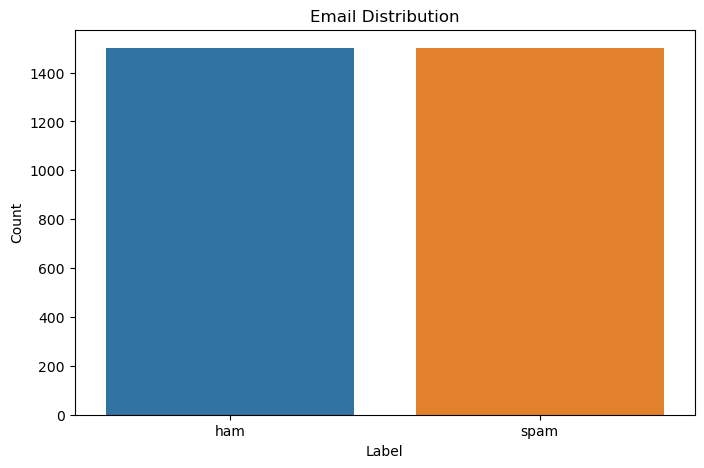

In [12]:
# get the counts for each label
display_label_counts(balanced_data_list)

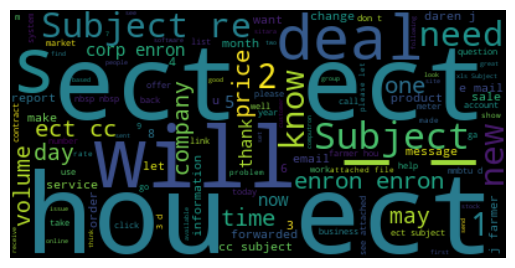

In [13]:
# create a wordcloud for the balanced text
create_wordcloud(balanced_data_list)

## Tokenize the data

### Set up stopwords list

In [14]:
# get a list of stopwords from nltk
nltk_stopwords_list = nltk.corpus.stopwords.words('english')

# create a list of additional stopwords
more_stopwords_list = ["Subject"]

# add the two stopword lists together
my_stopwords_list = nltk_stopwords_list + more_stopwords_list

### Tokenize the emails with and without stopwords removed

In [15]:
# define a function to tokenize data with a stopwords option
def tokenize_data(data, stopwords_list=[]):
    
    # create an empty list for the labels and tokenized text
    tokenized_list = []
    
    # tokenize and clean each email
    for label, text in data:
        
        # tokenize the text
        tokens = nltk.word_tokenize(text)

        # remove the stopwords
        new_tokens = [word for word in tokens if not word in stopwords_list]

        # append the email to the tokenized data list
        tokenized_list.append((label, new_tokens))
        
    # return the tokenized list
    return tokenized_list
    

In [16]:
# tokenize the raw data list without removing stopwords
raw_base_tok_list = tokenize_data(raw_data_list)

# tokenize the raw data list removing stopwords
raw_sw_tok_list = tokenize_data(raw_data_list, my_stopwords_list)

# tokenize the balanced data list without removing stopwords
balanced_base_tok_list = tokenize_data(balanced_data_list)

# tokenize the balanced data list removing stopwords
balanced_sw_tok_list = tokenize_data(balanced_data_list, my_stopwords_list)

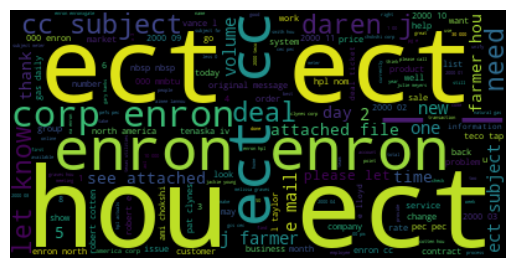

In [17]:
# create a wordcloud of the raw data with stopwords removed
create_wordcloud([(label, ' '.join(text)) for (label, text) in raw_sw_tok_list])

## Create Featuresets

- Unigram Frequency Featuresets
- Phrases and Punctuation Featuresets

### Unigrams Frequency Featuresets

#### Unigram Features

In [18]:
def get_word_frequencies(words_list):
    
    # get the frequency of the words
    words_freq_list = nltk.FreqDist(words_list)
    
    # print the number of words
    print(f'Number of words: {str(len(words_freq_list))}')
    
    # print the most common words
    print(f'Most common words: \n {words_freq_list.most_common(50)}')
    
    return words_freq_list

def unigram_features(tokenized_data_list):
    
    print("All Words")
    
    # get all the words
    all_words_list = [word for (label,text) in tokenized_data_list for word in text]
    
    # get the frequency of the words
    all_words_freq_list = get_word_frequencies(all_words_list)
    
    # get the 2000 most frequently appearing keywords in the corpus
    most_freq_words_list = all_words_freq_list.most_common(2000)
    
    # create the list of words to use in the feature sets
    word_features_list = [word for (word, count) in most_freq_words_list]
    
    print("\nHam Words")
    
    # get all the ham words
    ham_words_list = [word for (label,text) in tokenized_data_list if label=="ham" for word in text]
    
    # get the frequency of the ham words
    ham_words_freq_list = get_word_frequencies(ham_words_list)
    
    print("\nSpam Words")
    
    # get all the spam words
    spam_words_list = [word for (label,text) in tokenized_data_list if label=="spam" for word in text]
    
    # get the frequency of the spam words
    spam_words_freq_list = get_word_frequencies(spam_words_list)
    
    return word_features_list

In [19]:
# get the features for the raw data without stopwords removed
raw_base_features = unigram_features(raw_base_tok_list)

All Words
Number of words: 50566
Most common words: 
 [('-', 85724), ('.', 54709), ('/', 42848), (',', 40664), (':', 30278), ('the', 25656), ('to', 20345), ('ect', 13900), ('and', 12829), ('@', 12736), ('for', 10508), ('of', 10188), ('a', 9820), ('you', 8162), ('in', 7717), ("'", 7542), ('on', 7317), ('hou', 7289), ('this', 7171), ('is', 7170), ('?', 6881), ('enron', 6555), ('i', 6391), (')', 6089), ('(', 5758), ('>', 5622), ('Subject', 5172), ('be', 5067), ('=', 4912), ('that', 4769), (';', 4708), ('2000', 4386), ('we', 4341), ('from', 4192), ('will', 4137), ('have', 4097), ('your', 4042), ('with', 3987), ('at', 3735), ('com', 3710), ('!', 3637), ('s', 3435), ('are', 3388), ('it', 3335), ('please', 3200), ('as', 3157), ('if', 3135), ('or', 3080), ('not', 3074), ('gas', 3034)]

Ham Words
Number of words: 20249
Most common words: 
 [('-', 77782), ('/', 37141), ('.', 35192), (',', 29413), (':', 24164), ('the', 18359), ('to', 15172), ('ect', 13897), ('@', 12168), ('for', 7982), ('and', 79

In [20]:
# get the features for the raw data with stopwords removed
raw_sw_features = unigram_features(raw_sw_tok_list)

All Words
Number of words: 50413
Most common words: 
 [('-', 85724), ('.', 54709), ('/', 42848), (',', 40664), (':', 30278), ('ect', 13900), ('@', 12736), ("'", 7542), ('hou', 7289), ('?', 6881), ('enron', 6555), (')', 6089), ('(', 5758), ('>', 5622), ('=', 4912), (';', 4708), ('2000', 4386), ('com', 3710), ('!', 3637), ('please', 3200), ('gas', 3034), ('``', 3020), ('_', 3009), ('3', 2922), ('$', 2891), ('subject', 2889), ('deal', 2827), ('1', 2743), ('meter', 2459), ('00', 2404), ('#', 2385), ('2', 2379), ('cc', 2371), ('pm', 2343), ('hpl', 2318), ('000', 2127), ('10', 2113), ('2001', 2028), ('e', 1976), ('daren', 1901), ('thanks', 1898), ('01', 1794), ('corp', 1776), ('|', 1739), ('%', 1609), ('&', 1604), ('know', 1588), ('0', 1586), ('4', 1577), ('*', 1574)]

Ham Words
Number of words: 20100
Most common words: 
 [('-', 77782), ('/', 37141), ('.', 35192), (',', 29413), (':', 24164), ('ect', 13897), ('@', 12168), ('hou', 7281), ('enron', 6555), ("'", 5780), ('>', 5559), (')', 4539), 

In [21]:
# get the features for the balanced data without stopwords removed
balanced_base_features = unigram_features(balanced_base_tok_list)

All Words
Number of words: 45059
Most common words: 
 [('-', 39449), ('.', 33780), (',', 23030), ('/', 20376), (':', 15500), ('the', 15151), ('to', 11430), ('and', 8201), ('of', 6989), ('a', 6337), ('for', 5829), ('?', 5316), ('ect', 5254), ('in', 5109), ('you', 5074), ('@', 4970), ('is', 4271), ('this', 4258), ('>', 4192), ('on', 3751), ('=', 3719), (')', 3416), ("'", 3398), ('i', 3256), ('(', 3218), ('Subject', 3000), ('!', 2925), ('be', 2881), ('your', 2833), ('hou', 2760), ('that', 2760), ('enron', 2589), ('with', 2497), ('we', 2493), ('from', 2278), ('have', 2247), ('s', 2221), ('$', 2221), ('_', 2162), ('will', 2134), ('are', 2055), ('as', 2015), ('or', 2011), ('it', 2007), (';', 1995), ('3', 1886), ('at', 1881), ('not', 1868), ('com', 1845), ('2000', 1794)]

Ham Words
Number of words: 12963
Most common words: 
 [('-', 31507), ('/', 14669), ('.', 14263), (',', 11779), (':', 9386), ('the', 7854), ('to', 6257), ('ect', 5251), ('@', 4402), ('>', 4129), ('for', 3303), ('and', 3284), 

In [22]:
# get the features for the balanced data with stopwords removed
balanced_sw_features = unigram_features(balanced_sw_tok_list)

All Words
Number of words: 44907
Most common words: 
 [('-', 39449), ('.', 33780), (',', 23030), ('/', 20376), (':', 15500), ('?', 5316), ('ect', 5254), ('@', 4970), ('>', 4192), ('=', 3719), (')', 3416), ("'", 3398), ('(', 3218), ('!', 2925), ('hou', 2760), ('enron', 2589), ('$', 2221), ('_', 2162), (';', 1995), ('3', 1886), ('com', 1845), ('2000', 1794), ('|', 1668), ('please', 1602), ('1', 1582), ('``', 1552), ('2', 1472), ('00', 1297), ('%', 1295), ('gas', 1287), ('subject', 1235), ('e', 1224), ('#', 1214), ('deal', 1159), ('*', 1140), ('http', 1096), ('0', 1073), ('10', 1068), ('000', 1030), ('meter', 985), ('cc', 941), ('4', 917), ('5', 912), ('hpl', 907), ('pm', 891), ('company', 881), ('new', 859), ('price', 818), ('get', 799), ('may', 786)]

Ham Words
Number of words: 12817
Most common words: 
 [('-', 31507), ('/', 14669), ('.', 14263), (',', 11779), (':', 9386), ('ect', 5251), ('@', 4402), ('>', 4129), ('hou', 2752), ('enron', 2589), (')', 1866), ('2000', 1716), ('(', 1704), 

#### Unigram Counts Featureset

In [23]:
# define function to get the word counts of each email
def word_frequency_features(tokens, word_features_list):
    document_word_freq = nltk.FreqDist(tokens)
    features = {}
    for word in word_features_list:
        if word in document_word_freq.keys():
            features[word] = document_word_freq[word]
        else:
            features[word] = 0
    return features

# use the function to create the featuresets
raw_base_featuresets = [(word_frequency_features(tokens, raw_base_features), label) for (label, tokens) in raw_base_tok_list]

# use the function to create the featuresets
raw_sw_featuresets = [(word_frequency_features(tokens, raw_sw_features), label) for (label, tokens) in raw_sw_tok_list]

# use the function to create the featuresets
balanced_base_featuresets = [(word_frequency_features(tokens, balanced_base_features), label) for (label, tokens) in balanced_base_tok_list]

# use the function to create the featuresets
balanced_sw_featuresets = [(word_frequency_features(tokens, balanced_sw_features), label) for (label, tokens) in balanced_sw_tok_list]

#### Unigram Classification

In [24]:
## cross-validation ##
# this function takes the number of folds, the feature sets
# it iterates over the folds, using different sections for training and testing in turn
#   it prints the accuracy for each fold and the average accuracy at the end
def cross_validation_accuracy(num_folds, featuresets):
    subset_size = int(len(featuresets)/num_folds)
    print('Each fold size:', subset_size)
    accuracy_list = []
    # iterate over the folds
    for i in range(num_folds):
        test_this_round = featuresets[(i*subset_size):][:subset_size]
        train_this_round = featuresets[:(i*subset_size)] + featuresets[((i+1)*subset_size):]
        # train using train_this_round
        classifier = nltk.NaiveBayesClassifier.train(train_this_round)
        
        # evaluate against test_this_round and save accuracy
        accuracy_this_round = nltk.classify.accuracy(classifier, test_this_round)
        print (i, accuracy_this_round)
        # add the accuracy to the accuracy list
        accuracy_list.append(accuracy_this_round)
        
    # find mean accuracy over all rounds
    print ('Mean Accuracy', sum(accuracy_list) / num_folds)
    

In [25]:
# define a function to show the confusion matrix
def create_confusion_matrix(goldlist, predictedlist, classes):
    
    counter = 0
    for count, label in enumerate(goldlist):
        if label == 'ham' and predictedlist[count] == 'spam':
            counter+=1
    print(f'{counter} times when ham was labeled as spam')
            
    
    # print the confusion matrix
    cm = nltk.ConfusionMatrix(goldlist, predictedlist)
    print(cm.pretty_format(sort_by_count=True, truncate=9))
    
    # show the results as percentages
    print(cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))
    
    cm = metrics.confusion_matrix(goldlist, predictedlist, labels=classes)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    plt.show()

In [26]:
# Function to compute precision, recall and F1 for each label
#  and for any number of labels
# Input: list of gold labels, list of predicted labels (in same order)
# Output:  prints precision, recall and F1 for each label
def eval_measures(gold, predicted):
    # get a list of labels
    labels = list(set(gold))
    # these lists have values for each label 
    recall_list = []
    precision_list = []
    F1_list = []
    for lab in labels:
        # for each label, compare gold and predicted lists and compute values
        TP = FP = FN = TN = 0
        for i, val in enumerate(gold):
            if val == lab and predicted[i] == lab:  TP += 1
            if val == lab and predicted[i] != lab:  FN += 1
            if val != lab and predicted[i] == lab:  FP += 1
            if val != lab and predicted[i] != lab:  TN += 1
        # use these to compute recall, precision, F1
        recall = TP / (TP + FP)
        precision = TP / (TP + FN)
        recall_list.append(recall)
        precision_list.append(precision)
        F1_list.append( 2 * (recall * precision) / (recall + precision))

    # the evaluation measures in a table with one row per label
    print('\tPrecision\tRecall\t\tF1')
    # print measures for each label
    for i, lab in enumerate(labels):
        print(lab, '\t', "{:10.3f}".format(precision_list[i]), \
          "{:10.3f}".format(recall_list[i]), "{:10.3f}".format(F1_list[i]))

In [43]:
# define function to split the data
def train_test_accuracy(featuresets):
    
    # set the training set size as approximately 70% of data
    size = int(len(featuresets) * 0.7)
    # create the training and testnig data sets
    train_set, test_set = featuresets[:size], featuresets[size:]
    
    # train the model
    classifier = nltk.NaiveBayesClassifier.train(train_set)
    
    # evaluate the accuracy of the classifier
    print(f'Test Accuracy: {nltk.classify.accuracy(classifier, test_set)}')
    
    # create lists of predictions and actual labels
    goldlist = []
    predictedlist = []
    for (features, label) in test_set:
        goldlist.append(label)
        predictedlist.append(classifier.classify(features))
        
    classes = classifier.labels()
    
    # create a confusion matrix
    create_confusion_matrix(goldlist, predictedlist, classes)
    
    if len(set(predictedlist))==2:
        # print evaluation measure
        eval_measures(goldlist, predictedlist)
    
    # show which features of classifier are most informative
    print(classifier.show_most_informative_features(30))

In [44]:
# perform the cross-validation on the featuresets with word features and generate accuracy
num_folds = 5
cross_validation_accuracy(num_folds, raw_base_featuresets)

Each fold size: 1034
0 0.9468085106382979
1 0.9400386847195358
2 0.9642166344294004
3 0.9584139264990329
4 0.9613152804642167
Mean Accuracy 0.9541586073500966


Test Accuracy: 0.9626288659793815
57 times when ham was labeled as spam
     |         s |
     |    h    p |
     |    a    a |
     |    m    m |
-----+-----------+
 ham |<1041>  57 |
spam |    1 <453>|
-----+-----------+
(row = reference; col = test)

     |             s |
     |      h      p |
     |      a      a |
     |      m      m |
-----+---------------+
 ham | <67.1%>  3.7% |
spam |   0.1% <29.2%>|
-----+---------------+
(row = reference; col = test)



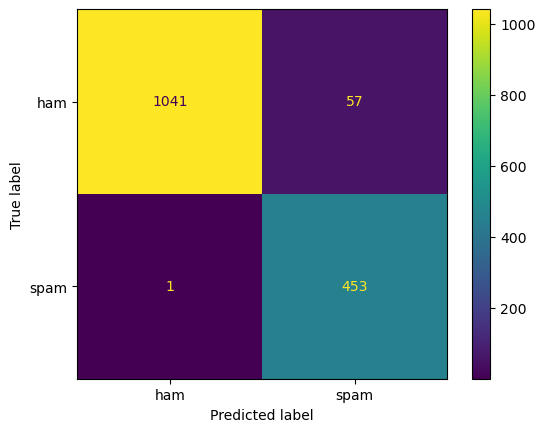

	Precision	Recall		F1
ham 	      0.948      0.999      0.973
spam 	      0.998      0.888      0.940
Most Informative Features
               forwarded = 1                 ham : spam   =    132.1 : 1.0
                    2004 = 1                spam : ham    =     94.1 : 1.0
                    pain = 1                spam : ham    =     74.5 : 1.0
                thousand = 1                spam : ham    =     66.3 : 1.0
                creative = 1                spam : ham    =     59.8 : 1.0
                      ex = 1                spam : ham    =     59.8 : 1.0
                     ibm = 1                spam : ham    =     56.6 : 1.0
                     sex = 1                spam : ham    =     56.5 : 1.0
               clearance = 1                spam : ham    =     54.9 : 1.0
                       u = 3                spam : ham    =     53.2 : 1.0
                     971 = 2                spam : ham    =     50.0 : 1.0
              trademarks = 1                spam

In [45]:
# get the train test accuracy
train_test_accuracy(raw_base_featuresets)

In [46]:
# perform the cross-validation on the featuresets with word features and generate accuracy
num_folds = 5
cross_validation_accuracy(num_folds, raw_sw_featuresets)

Each fold size: 1034
0 0.9477756286266924
1 0.937137330754352
2 0.9642166344294004
3 0.9593810444874274
4 0.9632495164410058
Mean Accuracy 0.9543520309477757


Test Accuracy: 0.9645618556701031
53 times when ham was labeled as spam
     |         s |
     |    h    p |
     |    a    a |
     |    m    m |
-----+-----------+
 ham |<1045>  53 |
spam |    2 <452>|
-----+-----------+
(row = reference; col = test)

     |             s |
     |      h      p |
     |      a      a |
     |      m      m |
-----+---------------+
 ham | <67.3%>  3.4% |
spam |   0.1% <29.1%>|
-----+---------------+
(row = reference; col = test)



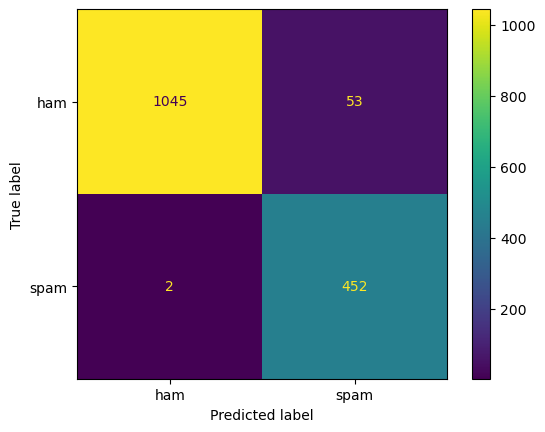

	Precision	Recall		F1
ham 	      0.952      0.998      0.974
spam 	      0.996      0.895      0.943
Most Informative Features
               forwarded = 1                 ham : spam   =    132.1 : 1.0
                    2004 = 1                spam : ham    =     94.1 : 1.0
                    pain = 1                spam : ham    =     74.5 : 1.0
                thousand = 1                spam : ham    =     66.3 : 1.0
                creative = 1                spam : ham    =     59.8 : 1.0
                      ex = 1                spam : ham    =     59.8 : 1.0
                     ibm = 1                spam : ham    =     56.6 : 1.0
                     sex = 1                spam : ham    =     56.5 : 1.0
               clearance = 1                spam : ham    =     54.9 : 1.0
                       u = 3                spam : ham    =     53.2 : 1.0
                     971 = 2                spam : ham    =     50.0 : 1.0
              trademarks = 1                spam

In [47]:
# get the train test accuracy
train_test_accuracy(raw_sw_featuresets)

In [48]:
# perform the cross-validation on the featuresets with word features and generate accuracy
num_folds = 5
cross_validation_accuracy(num_folds, balanced_base_featuresets)

Each fold size: 600
0 0.9566666666666667
1 0.9633333333333334
2 0.9583333333333334
3 0.97
4 0.9683333333333334
Mean Accuracy 0.9633333333333335


Test Accuracy: 0.9655555555555555
29 times when ham was labeled as spam
     |       s |
     |   h   p |
     |   a   a |
     |   m   m |
-----+---------+
 ham |<422> 29 |
spam |   2<447>|
-----+---------+
(row = reference; col = test)

     |             s |
     |      h      p |
     |      a      a |
     |      m      m |
-----+---------------+
 ham | <46.9%>  3.2% |
spam |   0.2% <49.7%>|
-----+---------------+
(row = reference; col = test)



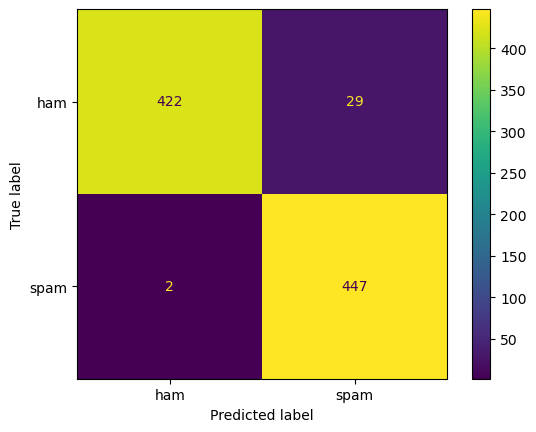

	Precision	Recall		F1
ham 	      0.936      0.995      0.965
spam 	      0.996      0.939      0.966
Most Informative Features
               forwarded = 1                 ham : spam   =    119.2 : 1.0
                     nom = 1                 ham : spam   =     73.1 : 1.0
                    2004 = 1                spam : ham    =     39.6 : 1.0
                      cc = 1                 ham : spam   =     36.0 : 1.0
              nomination = 1                 ham : spam   =     35.1 : 1.0
                    2000 = 2                 ham : spam   =     34.5 : 1.0
              compliance = 1                spam : ham    =     34.3 : 1.0
                    2001 = 1                 ham : spam   =     30.2 : 1.0
                     gas = 3                 ham : spam   =     29.7 : 1.0
               microsoft = 1                spam : ham    =     28.9 : 1.0
                    2000 = 4                 ham : spam   =     28.4 : 1.0
                    2005 = 1                spam

In [49]:
# get the train test accuracy
train_test_accuracy(balanced_base_featuresets)

In [50]:
# perform the cross-validation on the featuresets with word features and generate accuracy
num_folds = 5
cross_validation_accuracy(num_folds, balanced_sw_featuresets)

Each fold size: 600
0 0.955
1 0.9666666666666667
2 0.9616666666666667
3 0.9716666666666667
4 0.9616666666666667
Mean Accuracy 0.9633333333333333


Test Accuracy: 0.9611111111111111
30 times when ham was labeled as spam
     |       s |
     |   h   p |
     |   a   a |
     |   m   m |
-----+---------+
 ham |<421> 30 |
spam |   5<444>|
-----+---------+
(row = reference; col = test)

     |             s |
     |      h      p |
     |      a      a |
     |      m      m |
-----+---------------+
 ham | <46.8%>  3.3% |
spam |   0.6% <49.3%>|
-----+---------------+
(row = reference; col = test)



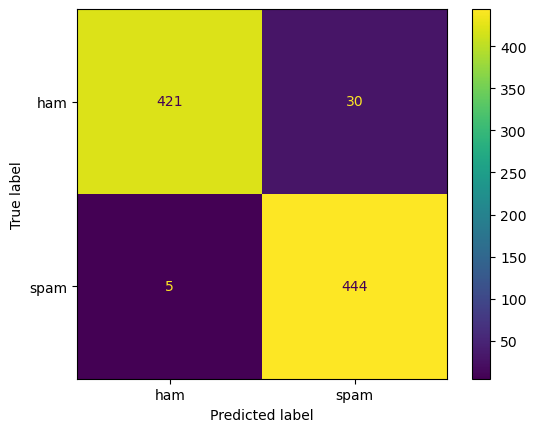

	Precision	Recall		F1
ham 	      0.933      0.988      0.960
spam 	      0.989      0.937      0.962
Most Informative Features
               forwarded = 1                 ham : spam   =    119.2 : 1.0
                     nom = 1                 ham : spam   =     73.1 : 1.0
                    2004 = 1                spam : ham    =     39.6 : 1.0
                      cc = 1                 ham : spam   =     36.0 : 1.0
              nomination = 1                 ham : spam   =     35.1 : 1.0
                    2000 = 2                 ham : spam   =     34.5 : 1.0
              compliance = 1                spam : ham    =     34.3 : 1.0
                    2001 = 1                 ham : spam   =     30.2 : 1.0
                     gas = 3                 ham : spam   =     29.7 : 1.0
               microsoft = 1                spam : ham    =     28.9 : 1.0
                    2000 = 4                 ham : spam   =     28.4 : 1.0
                    2005 = 1                spam

In [51]:
# get the train test accuracy
train_test_accuracy(balanced_sw_featuresets)

### Verb Phrases Featuresets

#### Verb Phrases Features

In [52]:
# tag the text, get freq info
tagged_dataset = [(nltk.pos_tag(token), label) for label, token in balanced_sw_tok_list]

In [53]:
def get_phrase_frequencies(phrases_list):
    
    # get the frequency of the phrases
    phrases_freq_list = nltk.FreqDist(phrases_list)
    
    # print the number of words
    print(f'Number of phrases: {str(len(phrases_freq_list))}')
    
    # print the most common words
    print(f'Most common phrases: \n {phrases_freq_list.most_common(50)}')
    
    return phrases_freq_list

In [54]:
# CREATING FUNCTIONS TO REUSE CODE FOR RETRIEVING DIFFERENTE TYPES OF PHRASES
def verb_phrases(tagged_dataset):
    
    print("All Verb Phrases")
    
    # create the grammar regex
    grammar = """
        NP: {<DT>?<JJ>*<NN>} 
        PP: {<IN><NP>}
        VP: {<VB.*><NP|PP>+$}
    """ 
    
    # get a list of lists containing tagged words of emails
    tagged_email_list = [tagged_email for (tagged_email, label) in tagged_dataset]
    
    # create an empty list to store verb phrases
    vp_chunks = []
    
    # parse each of the emails and get the verb phrases
    for tagged_tokens in tagged_email_list:
        # create the parser
        parser = nltk.RegexpParser(grammar, loop=2)
        # Parse the tagged text
        tree = parser.parse(tagged_tokens)     
        # get the verb phrases
        for subtree in tree.subtrees():
            if subtree.label() == 'VP':
                vp_chunks.append(' '.join([word for word, tag in subtree.leaves()]))
                #print(' '.join([word for word, tag in subtree.leaves()]))
    
    #print(' '.join([word for word, tag in vp_chunks[0].leaves()]))
                
    # get the frequency of the phrases
    all_vp_freq_list = get_phrase_frequencies(vp_chunks)
    
    # get the 2000 most frequently appearing phrases in the corpus
    most_freq_vp_list = all_vp_freq_list.most_common(2000)
    
    # create the list of phrases to use in the feature sets
    vp_features_list = [word for (word, count) in most_freq_vp_list]
    
    return vp_features_list

In [55]:
# get the verb phrases
balanced_sw_vp_features = verb_phrases(tagged_dataset)

All Verb Phrases
Number of phrases: 159
Most common phrases: 
 [('remove email', 15), ('see attached letter', 5), ('attached file', 3), ('change life', 2), ('stop future solicitation visit', 2), ('remove list', 2), ('use | site map', 2), ('chad cass', 2), ('injure maya tiptoe fulminate', 1), ('vlaggra % url', 1), ('see attached letter eb', 1), ('get free sony dvd handycam', 1), ('bridesmaid soapsud tango aliquot singular chicory agatha dean', 1), ('ko mao', 1), ('compote amende orbital irruption gfawn ax henrietta boatswain whither accompanist lint macintosh', 1), ('stop future solicitation click', 1), ('oa phillip love tbd', 1), ('authenticclaire inequality offalvisage', 1), ('include semite arteriole amende attire', 1), ('hornet charity', 1), ('begin change', 1), ('duplicatefell quasicontinuous specimenwhitehead timeshare patinacheryl cheerful chubbycrappie buttonweed censorialbumblebee', 1), ('pulled awaydeiivery', 1), ('bocklogged jury restaurateur piedmont gather somebody millenar

#### Verb Phrases Featuresets

In [56]:
# define function to get the phrase counts of each email
def phrase_frequency_features(phrases, phrase_features_list):
    
    # get the frequency of the prhases
    document_phrase_freq = nltk.FreqDist(phrases)
    features = {}
    for phrase in phrase_features_list:
        if phrase in document_phrase_freq.keys():
            features[phrase] = document_phrase_freq[phrase]
        else:
            features[phrase] = 0
    return features

# use the function to create the featuresets
balanced_sw_vp_featuresets = [(phrase_frequency_features(phrases, balanced_sw_vp_features), label) for (phrases, label) in tagged_dataset]


#### Verb Phrases Classification

In [57]:
# perform the cross-validation on the featuresets with word features and generate accuracy
num_folds = 5
cross_validation_accuracy(num_folds, balanced_sw_vp_featuresets)

Each fold size: 600
0 0.49333333333333335
1 0.5
2 0.49166666666666664
3 0.49833333333333335
4 0.49666666666666665
Mean Accuracy 0.496


Test Accuracy: 0.4988888888888889
451 times when ham was labeled as spam
     |       s |
     |   h   p |
     |   a   a |
     |   m   m |
-----+---------+
 ham |  <.>451 |
spam |   .<449>|
-----+---------+
(row = reference; col = test)

     |             s |
     |      h      p |
     |      a      a |
     |      m      m |
-----+---------------+
 ham |     <.> 50.1% |
spam |      . <49.9%>|
-----+---------------+
(row = reference; col = test)



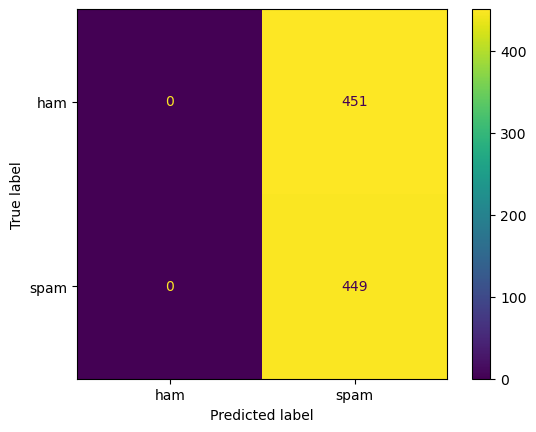

Most Informative Features
                   / ena = 0                 ham : spam   =      1.0 : 1.0
ache galen hiatus hermitian interrogate luminescent map sue = 0                 ham : spam   =      1.0 : 1.0
           added chevron = 0                 ham : spam   =      1.0 : 1.0
     aging clock nerissa = 0                 ham : spam   =      1.0 : 1.0
agnew olivetti sporty blanche bilateral cotty warmth waterbury synergism approximable barbaric bloc legitimate = 0                 ham : spam   =      1.0 : 1.0
      ambushed barreller = 0                 ham : spam   =      1.0 : 1.0
   april updated version = 0                 ham : spam   =      1.0 : 1.0
argonaut concrete collar gig claudio votive parch harrow becky sagebrush jitterbugger sanguineous skunk apocalypse carrot hoe homomorphic decertify musty camellia cologne = 0                 ham : spam   =      1.0 : 1.0
argot skit gallagher calcutta boule = 0                 ham : spam   =      1.0 : 1.0
           attached f

In [58]:
# get the train test accuracy
train_test_accuracy(balanced_sw_vp_featuresets)

### Punctuation Featursets

#### Punctuation Features

In [59]:
def get_punctuation_frequencies(punctuation_list):
    
    # get the frequency of the punctuation marks
    punctuation_freq_list = nltk.FreqDist(punctuation_list)
    
    # print the number of punctuation marks
    print(f'Number of punctuation marks: {str(len(punctuation_freq_list))}')
    
    # print the most common punctuation marks
    print(f'Most common punctuation marks: \n {punctuation_freq_list.most_common(50)}')
    
    return punctuation_freq_list


def punctuation_features(tokenized_data_list):
    
    print("All Punctuation Marks")
    
    # create a list of punctuation marks
    punctuation_marks = [*string.punctuation]
    
    # get all the words
    all_punctuation_list = [token for (label,text) in tokenized_data_list for token in text if token in punctuation_marks]
    
    # get the frequency of the punctuation
    all_punctuation_freq_list = get_punctuation_frequencies(all_punctuation_list)
    
    # get the 2000 most frequently appearing punctuation marks in the corpus
    most_freq_punctuation_list = all_punctuation_freq_list.most_common(2000)
    
    # create the list of punctuation to use in the feature sets
    punctuation_features_list = [token for (token, count) in most_freq_punctuation_list]
    
    return punctuation_features_list

In [60]:
# get the punctuation marks
balanced_sw_punct_features = punctuation_features(balanced_sw_tok_list)

All Punctuation Marks
Number of punctuation marks: 31
Most common punctuation marks: 
 [('-', 39449), ('.', 33780), (',', 23030), ('/', 20376), (':', 15500), ('?', 5316), ('@', 4970), ('>', 4192), ('=', 3719), (')', 3416), ("'", 3398), ('(', 3218), ('!', 2925), ('$', 2221), ('_', 2162), (';', 1995), ('|', 1668), ('%', 1295), ('#', 1214), ('*', 1140), ('&', 668), ('+', 530), ('[', 365), (']', 365), ('`', 125), ('\\', 86), ('~', 74), ('}', 57), ('{', 48), ('^', 44), ('<', 12)]


#### Punctuation Featuresets

In [61]:
# define function to get the phrase counts of each email
def punctuation_frequency_features(punctuation_marks, punctuation_features_list):
    
    # get the frequency of the punctuation marks
    document_punctuation_freq = nltk.FreqDist(punctuation_marks)
    features = {}
    for punctuation_mark in punctuation_features_list:
        if punctuation_mark in document_punctuation_freq.keys():
            features[punctuation_mark] = document_punctuation_freq[punctuation_mark]
        else:
            features[punctuation_mark] = 0
    return features

# use the function to create the featuresets
balanced_sw_punct_featuresets = [(punctuation_frequency_features(tokens, balanced_sw_punct_features), label) for (label, tokens) in balanced_sw_tok_list]


#### Punctuation Classification

In [62]:
# perform the cross-validation on the featuresets with word features and generate accuracy
num_folds = 5
cross_validation_accuracy(num_folds, balanced_sw_punct_featuresets)

Each fold size: 600
0 0.8366666666666667
1 0.8366666666666667
2 0.8166666666666667
3 0.8183333333333334
4 0.815
Mean Accuracy 0.8246666666666667


Test Accuracy: 0.8122222222222222
87 times when ham was labeled as spam
     |       s |
     |   h   p |
     |   a   a |
     |   m   m |
-----+---------+
 ham |<364> 87 |
spam |  82<367>|
-----+---------+
(row = reference; col = test)

     |             s |
     |      h      p |
     |      a      a |
     |      m      m |
-----+---------------+
 ham | <40.4%>  9.7% |
spam |   9.1% <40.8%>|
-----+---------------+
(row = reference; col = test)



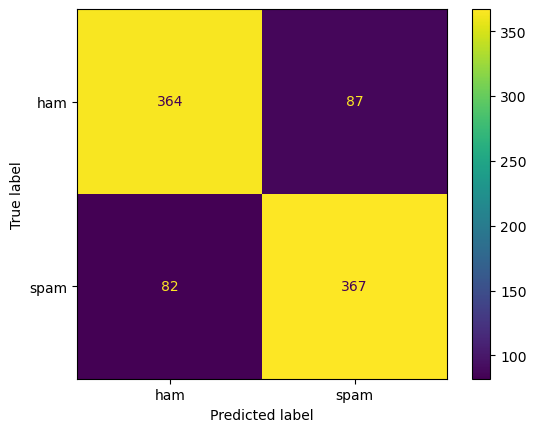

	Precision	Recall		F1
ham 	      0.807      0.816      0.812
spam 	      0.817      0.808      0.813
Most Informative Features
                       @ = 5                 ham : spam   =     21.7 : 1.0
                       - = 52                ham : spam   =     21.7 : 1.0
                       / = 16                ham : spam   =     11.7 : 1.0
                       _ = 5                spam : ham    =     10.3 : 1.0
                       - = 51                ham : spam   =      9.8 : 1.0
                       - = 22               spam : ham    =      9.6 : 1.0
                       ! = 7                spam : ham    =      9.0 : 1.0
                       ? = 6                 ham : spam   =      7.7 : 1.0
                       | = 1                spam : ham    =      7.7 : 1.0
                       ! = 8                spam : ham    =      7.7 : 1.0
                       # = 2                 ham : spam   =      7.6 : 1.0
                       / = 14                ham

In [63]:
# get the train test accuracy
train_test_accuracy(balanced_sw_punct_featuresets)

### Verb phrases and Punctuation Featureset

#### Verb Phrases and Punctuation Features

In [64]:
# combine the verb phrases and punctuation features
balanced_sw_vp_punct_features = balanced_sw_punct_features + balanced_sw_vp_features

#### Verb Phrases and Punctuation Featuresets

In [65]:
# combine the featuresets
balanced_sw_vp_punct_featuresets = []

for count, (features, label) in enumerate(balanced_sw_punct_featuresets):
    features.update(balanced_sw_vp_featuresets[count][0])
    balanced_sw_vp_punct_featuresets.append((features, label))
    
print(balanced_sw_vp_punct_featuresets[0])

({'-': 1, '.': 12, ',': 11, '/': 1, ':': 1, '?': 1, '@': 0, '>': 0, '=': 0, ')': 4, "'": 2, '(': 4, '!': 0, '$': 0, '_': 0, ';': 0, '|': 0, '%': 0, '#': 0, '*': 0, '&': 0, '+': 0, '[': 0, ']': 0, '`': 0, '\\': 0, '~': 0, '}': 0, '{': 0, '^': 0, '<': 0, 'remove email': 0, 'see attached letter': 0, 'attached file': 0, 'change life': 0, 'stop future solicitation visit': 0, 'remove list': 0, 'use | site map': 0, 'chad cass': 0, 'injure maya tiptoe fulminate': 0, 'vlaggra % url': 0, 'see attached letter eb': 0, 'get free sony dvd handycam': 0, 'bridesmaid soapsud tango aliquot singular chicory agatha dean': 0, 'ko mao': 0, 'compote amende orbital irruption gfawn ax henrietta boatswain whither accompanist lint macintosh': 0, 'stop future solicitation click': 0, 'oa phillip love tbd': 0, 'authenticclaire inequality offalvisage': 0, 'include semite arteriole amende attire': 0, 'hornet charity': 0, 'begin change': 0, 'duplicatefell quasicontinuous specimenwhitehead timeshare patinacheryl cheerf

#### Verb Phrases and Punctuation Classification

In [66]:
# perform the cross-validation on the featuresets with word features and generate accuracy
num_folds = 5
cross_validation_accuracy(num_folds, balanced_sw_vp_punct_featuresets)

Each fold size: 600
0 0.8366666666666667
1 0.8366666666666667
2 0.8166666666666667
3 0.8183333333333334
4 0.815
Mean Accuracy 0.8246666666666667


Test Accuracy: 0.8122222222222222
87 times when ham was labeled as spam
     |       s |
     |   h   p |
     |   a   a |
     |   m   m |
-----+---------+
 ham |<364> 87 |
spam |  82<367>|
-----+---------+
(row = reference; col = test)

     |             s |
     |      h      p |
     |      a      a |
     |      m      m |
-----+---------------+
 ham | <40.4%>  9.7% |
spam |   9.1% <40.8%>|
-----+---------------+
(row = reference; col = test)



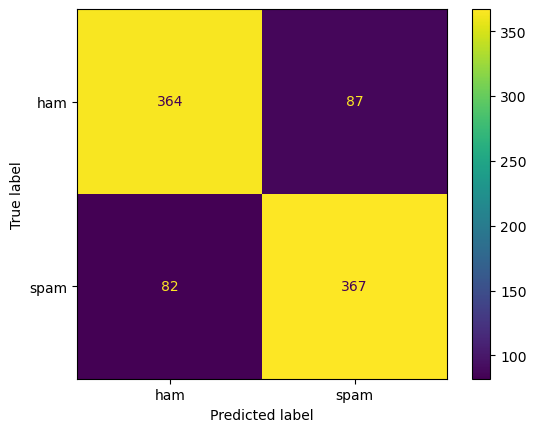

	Precision	Recall		F1
ham 	      0.807      0.816      0.812
spam 	      0.817      0.808      0.813
Most Informative Features
                       @ = 5                 ham : spam   =     21.7 : 1.0
                       - = 52                ham : spam   =     21.7 : 1.0
                       / = 16                ham : spam   =     11.7 : 1.0
                       _ = 5                spam : ham    =     10.3 : 1.0
                       - = 51                ham : spam   =      9.8 : 1.0
                       - = 22               spam : ham    =      9.6 : 1.0
                       ! = 7                spam : ham    =      9.0 : 1.0
                       ? = 6                 ham : spam   =      7.7 : 1.0
                       | = 1                spam : ham    =      7.7 : 1.0
                       ! = 8                spam : ham    =      7.7 : 1.0
                       # = 2                 ham : spam   =      7.6 : 1.0
                       / = 14                ham

In [67]:
# get the train test accuracy
train_test_accuracy(balanced_sw_vp_punct_featuresets)